# Project 2 : Time Series Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1:

## 1.Choose the dataset :

Apple Inc. stock data of last 20 years (July 18th, 2000 to July 18th, 2020) has been picked for this project.

# Loading the dataset

In [3]:
data = pd.read_csv('AAPL.csv')

In [14]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-07-19,3.941964,4.058036,3.696429,3.763393,3.257959,114468200
1,2000-07-20,3.928571,4.075893,3.866071,3.937500,3.408683,116393200
2,2000-07-21,3.882813,3.973214,3.781250,3.825893,3.312065,49058800
3,2000-07-24,3.754464,3.776786,3.392857,3.477679,3.010617,103042800
4,2000-07-25,3.593750,3.616071,3.504464,3.575893,3.095641,52901800


## This dataset has 5031 entries with 7 columns.

In [4]:
data.shape

(5031, 7)

## 2. Statistics about the dataset:

In [101]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,67.773052,68.462225,67.097275,67.807873,63.818878,1.131938e+08
std,75.908342,76.728740,75.209210,76.020822,74.919350,9.911286e+07
min,0.927857,0.942143,0.908571,0.937143,0.811282,9.835000e+06
25%,6.243571,6.312500,6.151785,6.252857,5.413082,4.487465e+07
50%,37.111427,37.450001,36.607143,37.040001,32.065430,8.461610e+07
75%,108.584999,109.350003,107.354999,108.525002,100.943378,1.505732e+08
max,395.959991,399.820007,385.959991,390.899994,390.899994,1.855410e+09


We can observe that all columns except volume are in similar range.

## Visualizing the dataset

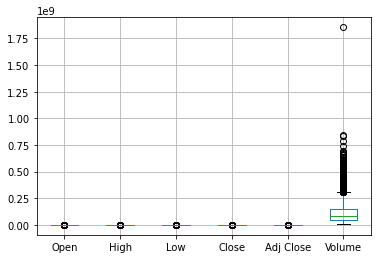

In [5]:
data.boxplot()

We can see that the values of the volume column is clearly dominating the above plot, leaving us with no specific insights.

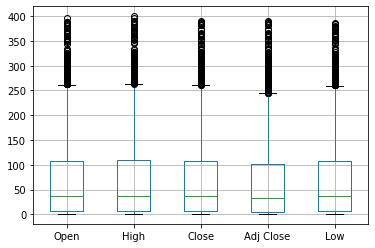

In [6]:
col = set(data.columns)
col.remove('Volume')
data[col].boxplot()

We can observe that values of all columns are very much close to each other. This implies that the values for each column of a single entry varies in very shorter range.

Volume column has been excluded from below visualizations as it has diferrent range of values than others.

Text(0.5, 1.0, 'Apple Stock Prices')

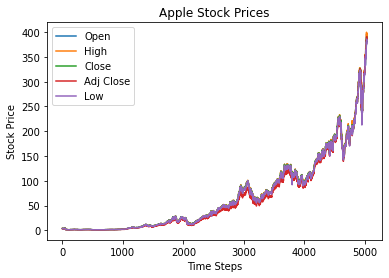

In [8]:
data[col].plot()
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Apple Stock Prices")

We can observe that columns ('Open', 'close', 'high', 'low', 'Adj Close') are very much aligned with each other through out entire timeline.

For better visualization, taking a specific time frame .

Text(0.5, 1.0, 'Apple Stock Prices (for last 30 timesteps)')

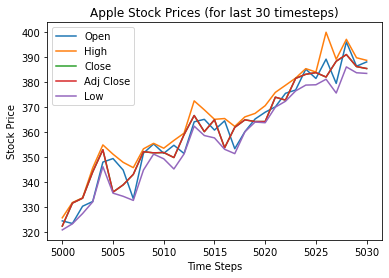

In [12]:
data[col][5000:].plot()
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Apple Stock Prices (for last 30 timesteps)")

Text(0.5, 1.0, 'Apple Stock Prices (for first 30 timesteps)')

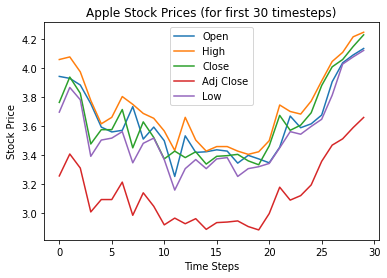

In [13]:
data[col][:30].plot()
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Apple Stock Prices (for first 30 timesteps)")

From the above two plots, we can observe that for last 30 time steps (last few months), the adjusted close value is almost same as close value but for first 30 time steps, the adjusted close value can be seen very much below low value. And another obvious insight is open and close is always between Open and Close.

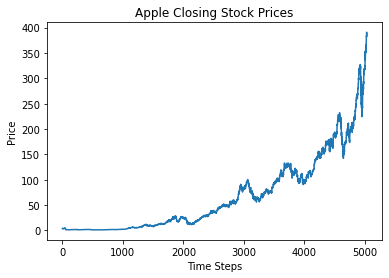

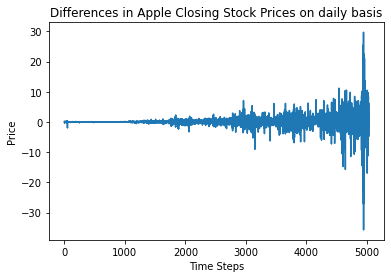

In [17]:
data['Close'].plot()
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.title("Apple Closing Stock Prices")
plt.show()

(data['Close']-data['Close'].shift(1)).plot()
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.title("Differences in Apple Closing Stock Prices on daily basis")
plt.show()

Looking at the above graph 'Differences in Apple Closing Stock Prices on daily basis', we can observe that the difference of closing stock price from before day got fluctuated largely between time steps from around 4500 to 5000.

Similar insight can be observed from the above 'Apple Closing Stock Prices' graph, there was a sudden dip and huge rise in the closing stock price from around 4500 to 5000.

## 3. Preprocess the dataset for training:

Checking for null values in the dataset.

In [15]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

We can see that there are no null values in the dataset. Dataset is already clean.

## Splitting the dataset into Training set and Testing set ( it is also used as Validation set)

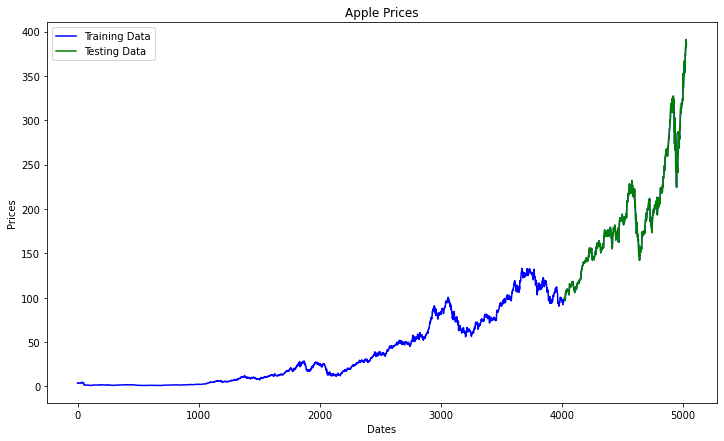

In [23]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

# Part 2:  Classical time series forecasting methods

## 1.Choosing features and targets in the dataset:

Target variable in the dataset is 'Close'. 
Feature variable is 'Close'. 

( We are going to predict the next upcoming closing stock value based on the previous closing stock values).

And the reason for not picking remaining variables is:

From the above visualisations, it is clear that except volume all other columns are very much correlated.

## 2. Apply statistical algorithms to forecast the values:

Text(0.5, 1.0, 'Amazon Autocorrelation plot')

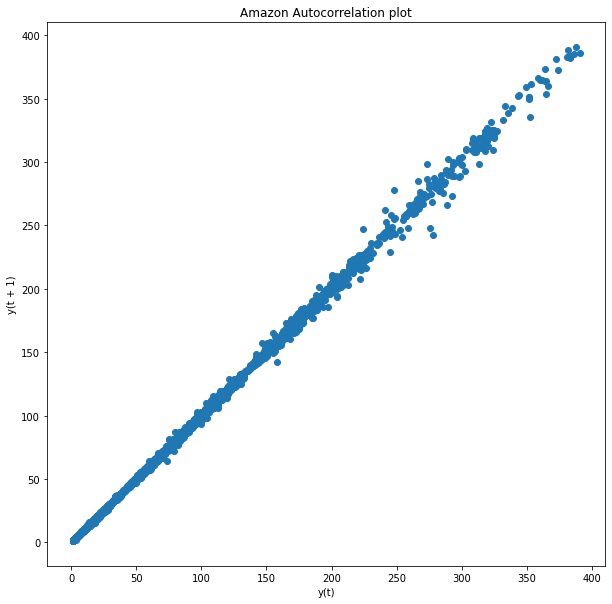

In [18]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10,10))
lag_plot(data['Close'], lag=1)
plt.title('Amazon Autocorrelation plot')

We can see that the closing prices are very much correlated with the previous day closing prices.

In [19]:
print(data['Close']-data['Close'].shift(1))

0            NaN
1       0.174107
2      -0.111607
3      -0.348214
4       0.098214
          ...   
5026   -1.769989
5027    6.320007
5028    2.669983
5029   -4.809998
5030   -0.779998
Name: Close, Length: 5031, dtype: float64


Looking the difference values between closing prices to its previous day closing prices.

Text(0.5, 1.0, 'Apple Autocorrelation plot')

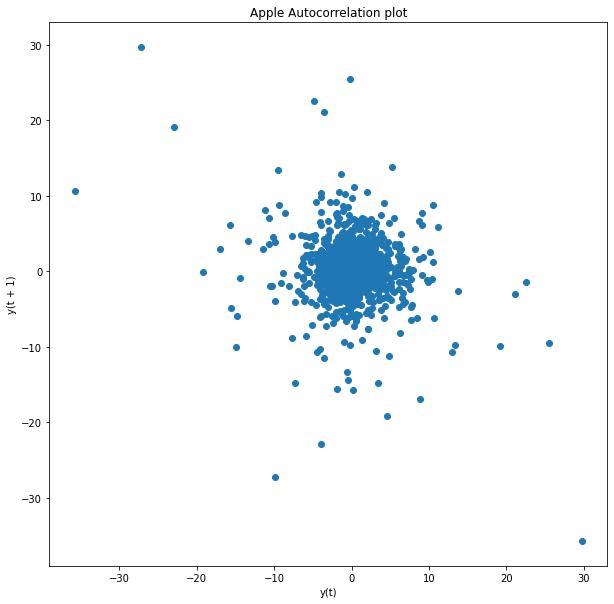

In [20]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10,10))
lag_plot((data['Close']-data['Close'].shift(1)), lag=1)
plt.title('Apple Autocorrelation plot')

We can observe that most of the difference values are near zero indicating that the closing value varied very little on from a day to next day. The points which are far from the cluster indicate that in very few instances, the closing value hugely dropped or rised compared to previous day.

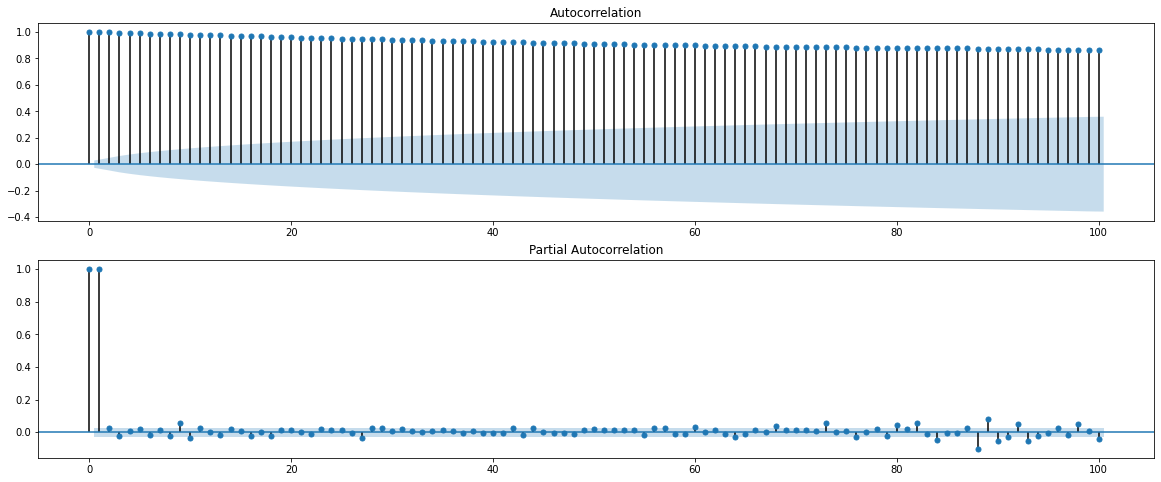

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Close'].iloc[13:],lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Close'].iloc[13:],lags=100,ax=ax2)

From the above plots showing Auto- correlation function and Partial Auto-correlation function, we can see that in Autocorrelation plot (it considers direct and indirect effect) even the closing values of stock from a day which is 100 days far from the current day effects the current day closing stock price to greater extent. Where as incase of Partial Autocorrelation plot (it considers only direct effect) the closing price value of the current day mostly depends on the previous day and negligibly small on any other previous day.

----

In order to make the dataset stationary, we need to look for at different degrees of differencing starting from 1.

As for many stationary models to perform better, stationarity is the necessary condition.


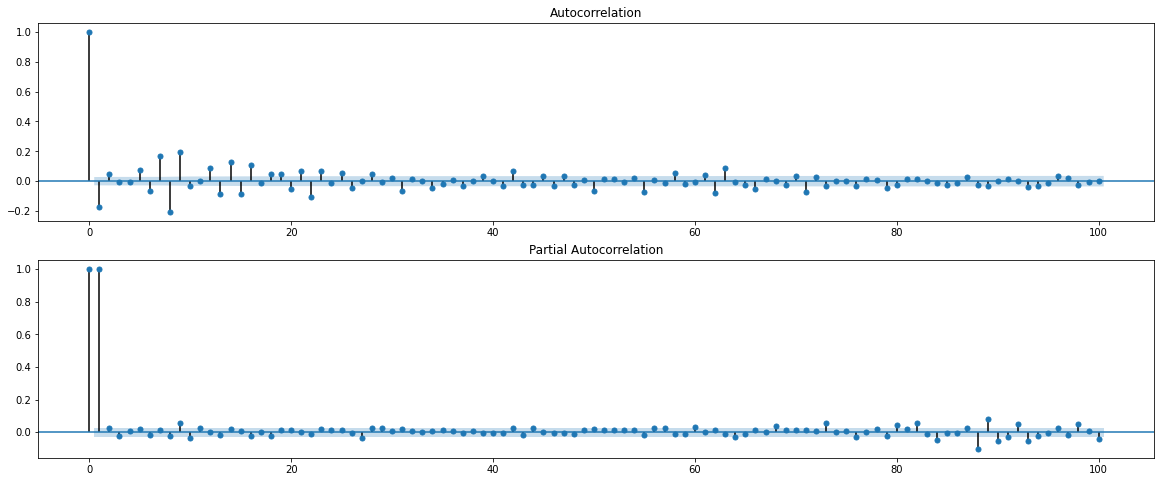

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf((data['Close']-data['Close'].shift(1)).iloc[13:],lags=100,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Close'].iloc[13:],lags=100,ax=ax2)

By shifting by one, we are imposing a degree of differencing as 1. And we can observe that the in the Auto correlation plot the dependencies of current day value on previous days are almost negligible now. Indicating that the data is now stationary.

If this did not work, our next step would be ton check for degree of differencing 2 (by shifting by 2).

As we can see data is made stationary by shifting by 1. paramter d would be 1 if arima is used.

Details about degree of differencing (shifting by d):

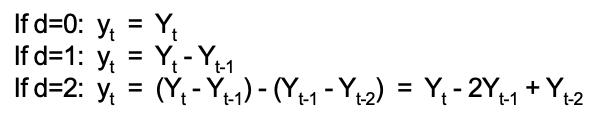

## Implementing ARIMA with lag order: 5, degree of differencing: 1 and order of moving average: 0

ARIMA model is a class of statistical models for analyzing and forecasting time series
data  
AR = Auto Regressive, A model that uses the dependent relationship
between an observation and some number of lagged observations.  
I = Integrated, The use of differencing of raw observations (e.g.
subtracting an observation from an observation at the previous time
step) in order to make the time series stationary.  
MA = Moving Average, A model that uses the dependency between an
observation and a residual error from a moving average model applied
to lagged observations.

lag order and degree of differencing is decided from the insights of the above auto-correlation plot.

In [24]:
from statsmodels.tsa.arima_model import ARIMA

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
# print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


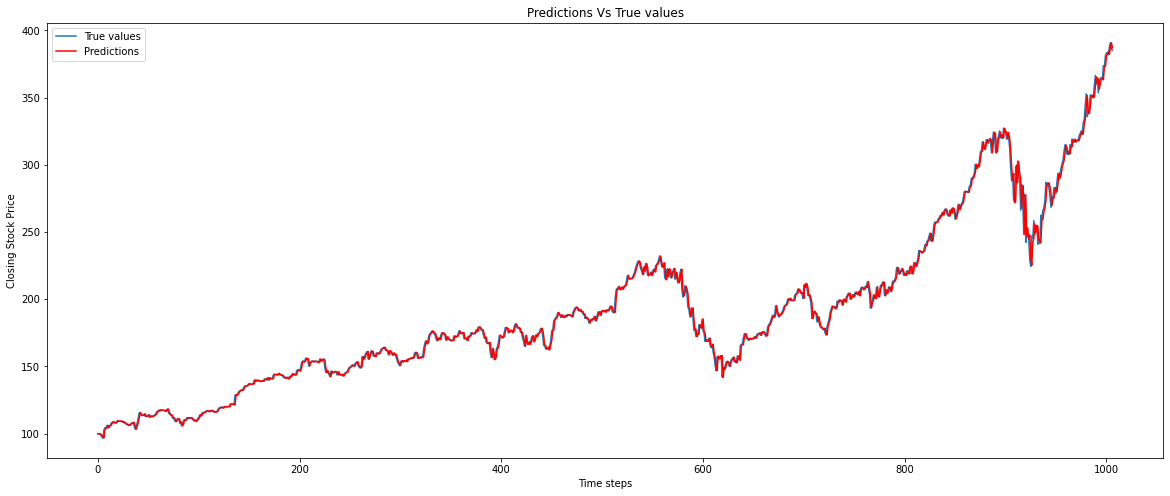

In [25]:
plt.figure(figsize=(20,8))
plt.plot(test_ar)
plt.plot(predictions, color='red')
plt.title('Predictions Vs True values')
plt.ylabel('Closing Stock Price')
plt.xlabel('Time steps')
plt.legend(['True values', 'Predictions'], loc='best')

It looks like predictions made by ARIMA are exactly matched with true values which is not true.

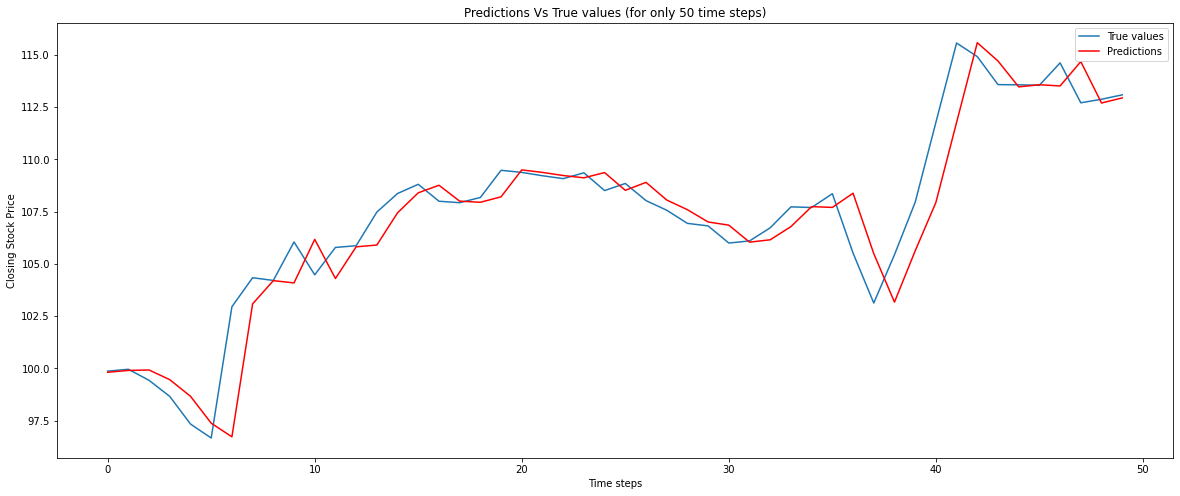

In [28]:
plt.figure(figsize=(20,8))
plt.plot(test_ar[:50])
plt.plot(predictions[:50], color='red')
plt.title('Predictions Vs True values (for only 50 time steps)')
plt.ylabel('Closing Stock Price')
plt.xlabel('Time steps')
plt.legend(['True values', 'Predictions'], loc='best')

Plotting for only 50 time steps shows us the difference between predictions made by ARIMA to the true values.

In [29]:
from sklearn.metrics import mean_squared_error
arima_mse = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: ', arima_mse)

Testing Mean Squared Error:  17.206066781441177


In [30]:
from sklearn.metrics import mean_absolute_error
arima_mae = mean_absolute_error(test_ar, predictions)
print('Testing Mean Squared Error: ', arima_mae)

Testing Mean Squared Error:  2.44169199947831


In [1]:
print("Testing Mean Absolute Error: 2.44169199947831")

Testing Mean Absolute Error: 2.44169199947831


In [31]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 5029
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10573.084
Method:                       css-mle   S.D. of innovations              1.981
Date:                Wed, 22 Jul 2020   AIC                          21160.168
Time:                        02:07:10   BIC                          21205.828
Sample:                             1   HQIC                         21176.166
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0762      0.026      2.915      0.004       0.025       0.127
ar.L1.D.y     -0.1699      0.014    -12.077      0.000      -0.197      -0.142
ar.L2.D.y      0.0192      0.014      1.348      0.1

Above is the ARIMA model summary.

## Implementing statistical model SARIMA with order = (p=2,d=1,q=0) and seasonal order = (P=2,D=1,Q=0,m=1)

Another SARIMA model with order = (p=5,d=1,q=0) and seasonal order = (P=5,D=1,Q=0,m=4) is attached in a seperate .ipynb file.

Seasonal Autoregressive Integrated Moving-Average (SARIMA), This method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.  
It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

In [128]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = SARIMAX(history, order=(2,1,0), seasonal_order = (2,1,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


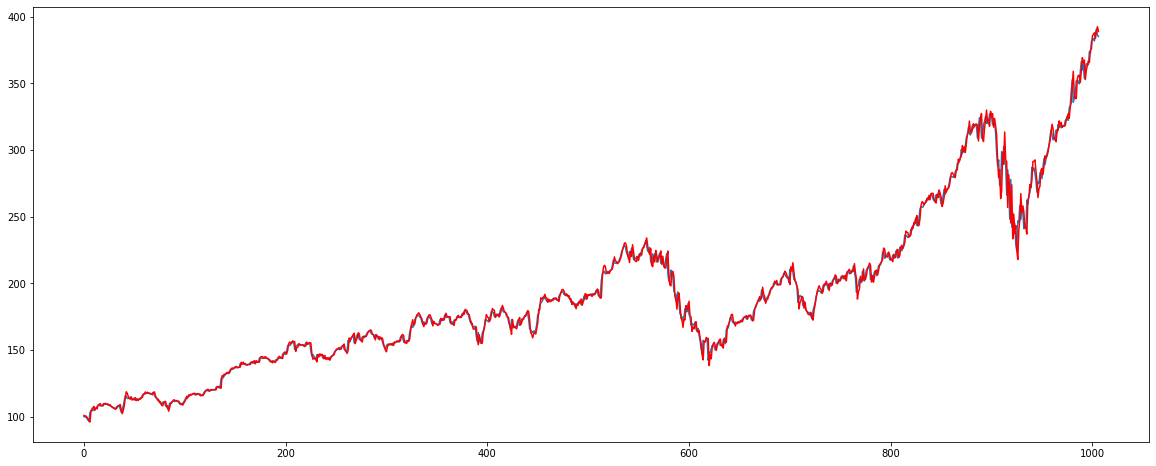

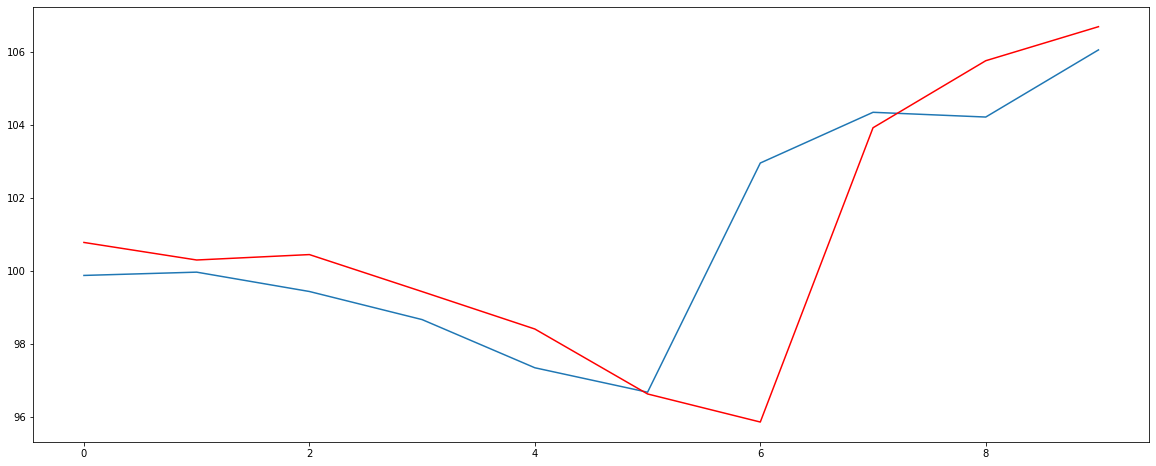

In [129]:
plt.figure(figsize=(20,8))
plt.plot(test_ar)
plt.plot(predictions, color='red')

plt.figure(figsize=(20,8))
plt.plot(test_ar[:10])
plt.plot(predictions[:10], color='red')

When plotted for entire time line, it looked like predictions made by ARIMA are exactly matched with true values which is not true.

Plotting for only 10 time steps shows us the difference between predictions made by ARIMA to the true values.

In [130]:
sarima_mse_2 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: ', sarima_mse_2)

sarima_mae_2 = mean_absolute_error(test_ar, predictions)
print('Testing Mean Squared Error: ', sarima_mae_2)

Testing Mean Squared Error: 21.455
Testing Mean Squared Error: 2.769


In [2]:
print("Testing Mean Absolute Error: 2.769")

Testing Mean Absolute Error: 2.769


In [38]:
sarima_mse_2 = 21.455
sarima_mae_2 = 2.769
sarima_mse_5 = 18.713
sarima_mae_5 = 2.622

## Implementation of statistical model: Simple Exponential Smoothing

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ses(history)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


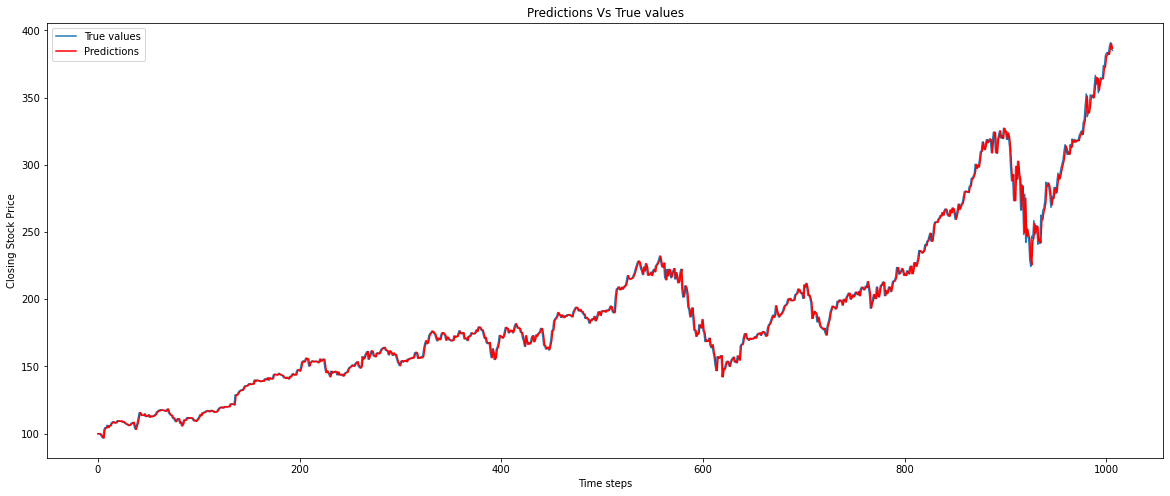

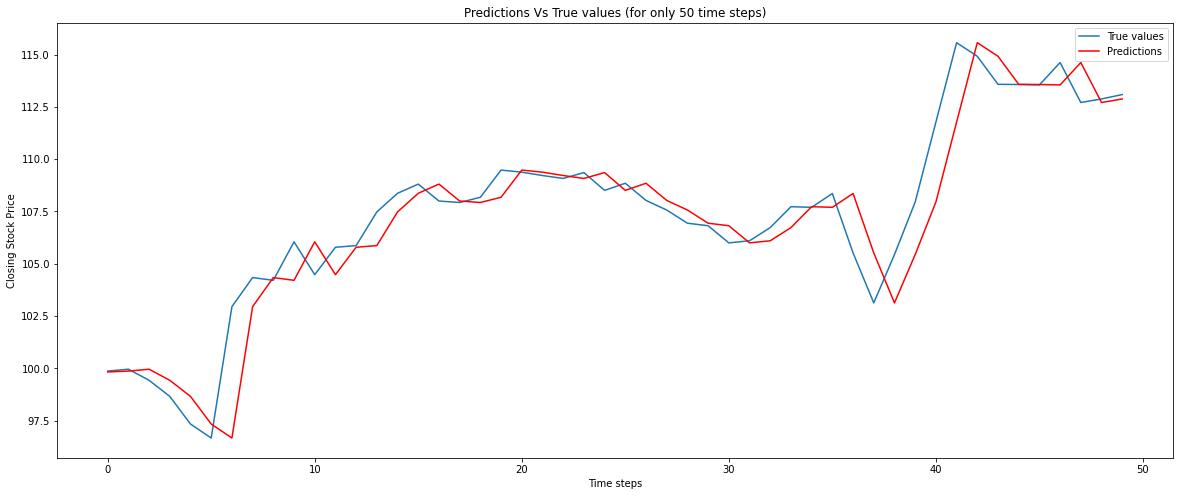

In [33]:
plt.figure(figsize=(20,8))
plt.plot(test_ar)
plt.plot(predictions, color='red')
plt.title('Predictions Vs True values')
plt.ylabel('Closing Stock Price')
plt.xlabel('Time steps')
plt.legend(['True values', 'Predictions'], loc='best')

plt.figure(figsize=(20,8))
plt.plot(test_ar[:50])
plt.plot(predictions[:50], color='red')
plt.title('Predictions Vs True values (for only 50 time steps)')
plt.ylabel('Closing Stock Price')
plt.xlabel('Time steps')
plt.legend(['True values', 'Predictions'], loc='best')

When plotted for entire time line, it looked like predictions made by ARIMA are exactly matched with true values which is not true.

Plotting for only 50 time steps shows us the difference between predictions made by ARIMA to the true values.

In [34]:
ses_mse = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: ', ses_mse)

ses_mae = mean_absolute_error(test_ar, predictions)
print('Testing Mean Squared Error: ', ses_mae)

Testing Mean Squared Error:  16.748315489274617
Testing Mean Squared Error:  2.4358455919559447


## Implementation of statistical model: Holt Winter's Exponential Smoothing

Holt Winter's Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as es


history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = es(history)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

<class 'list'>


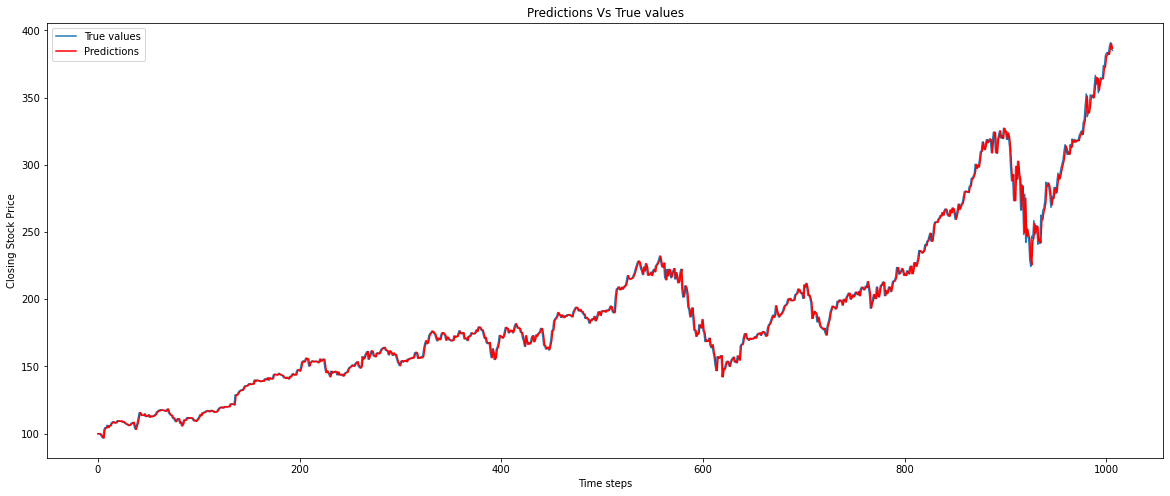

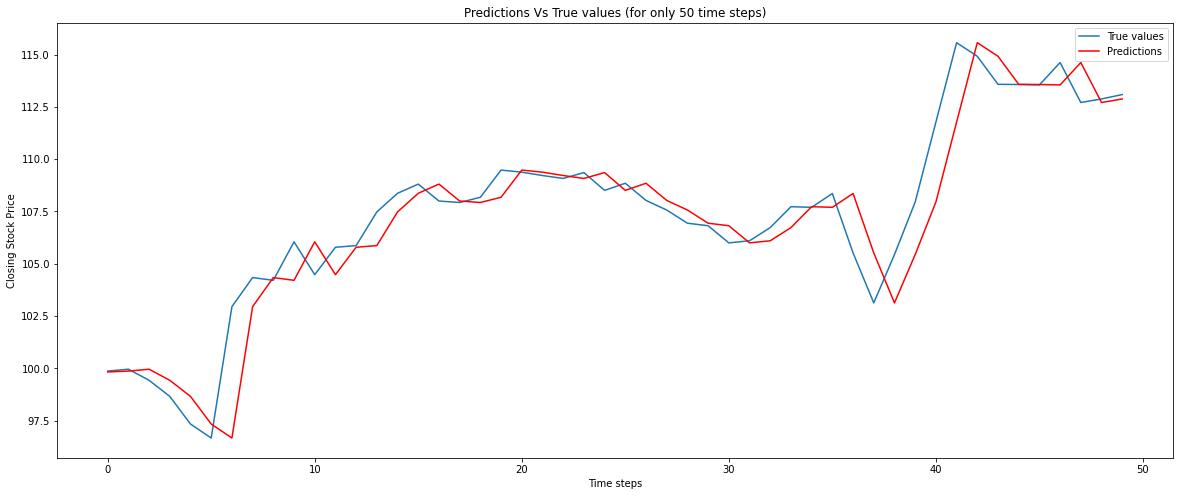

In [36]:
plt.figure(figsize=(20,8))
plt.plot(test_ar)
plt.plot(predictions, color='red')
plt.title('Predictions Vs True values')
plt.ylabel('Closing Stock Price')
plt.xlabel('Time steps')
plt.legend(['True values', 'Predictions'], loc='best')

plt.figure(figsize=(20,8))
plt.plot(test_ar[:50])
plt.plot(predictions[:50], color='red')
plt.title('Predictions Vs True values (for only 50 time steps)')
plt.ylabel('Closing Stock Price')
plt.xlabel('Time steps')
plt.legend(['True values', 'Predictions'], loc='best')

When plotted for entire time line, it looked like predictions made by ARIMA are exactly matched with true values which is not true.

Plotting for only 50 time steps shows us the difference between predictions made by ARIMA to the true values.

In [37]:
hses_mse = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: ', hses_mse)

hses_mae = mean_absolute_error(test_ar, predictions)
print('Testing Mean Squared Error: ', hses_mae)

Testing Mean Squared Error:  16.748315489274617
Testing Mean Squared Error:  2.4358455919559447


In [3]:
print("Testing Mean Absolute Error: 2.4358455919559447")

Testing Mean Absolute Error: 2.4358455919559447


## 3. Comparison of the results of different statistical models used above:

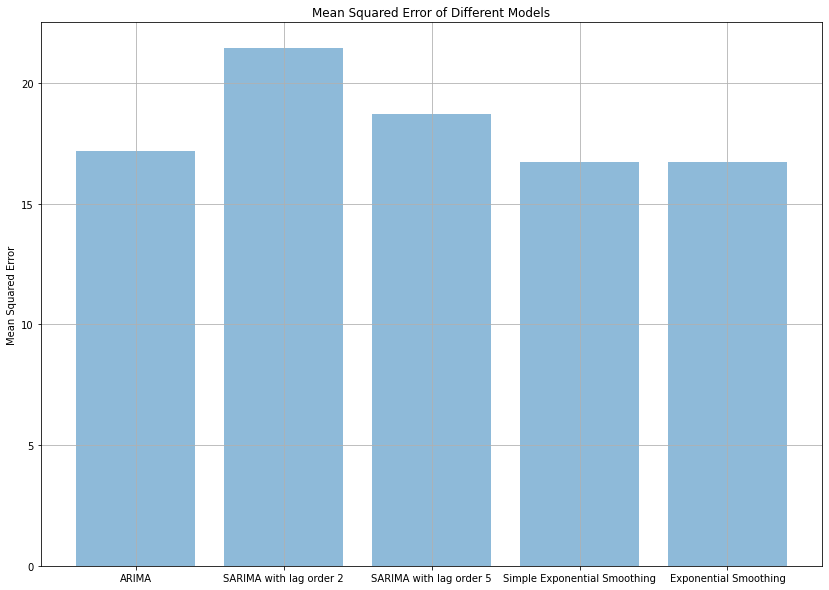

In [49]:
# Representing the Mean squared error of various models on a graph
objects = ('ARIMA', 'SARIMA with lag order 2', 'SARIMA with lag order 5', 'Simple Exponential Smoothing', 'Exponential Smoothing')
scores = [arima_mse, sarima_mse_2, sarima_mse_5, ses_mse, hses_mse]
plt.figure(figsize=(14, 10))
plt.bar(objects, scores, align='center', alpha=0.5)
plt.xticks(objects)
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')
plt.grid()
plt.show()

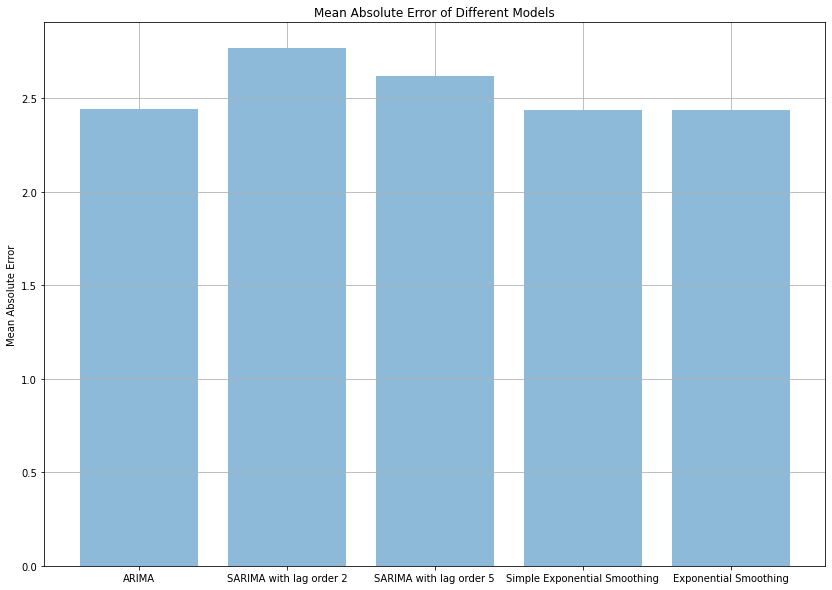

In [46]:
# Representing the Mean Absolute error of various models on a graph
objects = ('ARIMA', 'SARIMA with lag order 2', 'SARIMA with lag order 5', 'Simple Exponential Smoothing', 'Exponential Smoothing')
scores = [arima_mae, sarima_mae_2, sarima_mae_5, ses_mae, hses_mae]
plt.figure(figsize=(14, 10))
plt.bar(objects, scores, align='center', alpha=0.5)
plt.xticks(objects)
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of Different Models')
plt.grid()
plt.show()

We can see that both Mean Squared Error and Mean Absolute Error of Simple Exponential Smoothing, Exponential Smoothing are same and less than rest. Even ARIMA is very much closer to the above two statistical models. SARIMA model with lag order of 2, sessional period 1 had higher error than rest followed by SARIMA model with lag order of 5, sessional period 4.
Maybe we may achieve better results if we correctly pick suitable sessional period. Recent irregular variations may have disturbed the seasonality of the data.
